# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00042_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00043_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00045_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00046_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00042_ocubes.fits 3277.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00043_ocubes.fits 3277.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_00045_ocubes.fits 3277.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/kb210218_

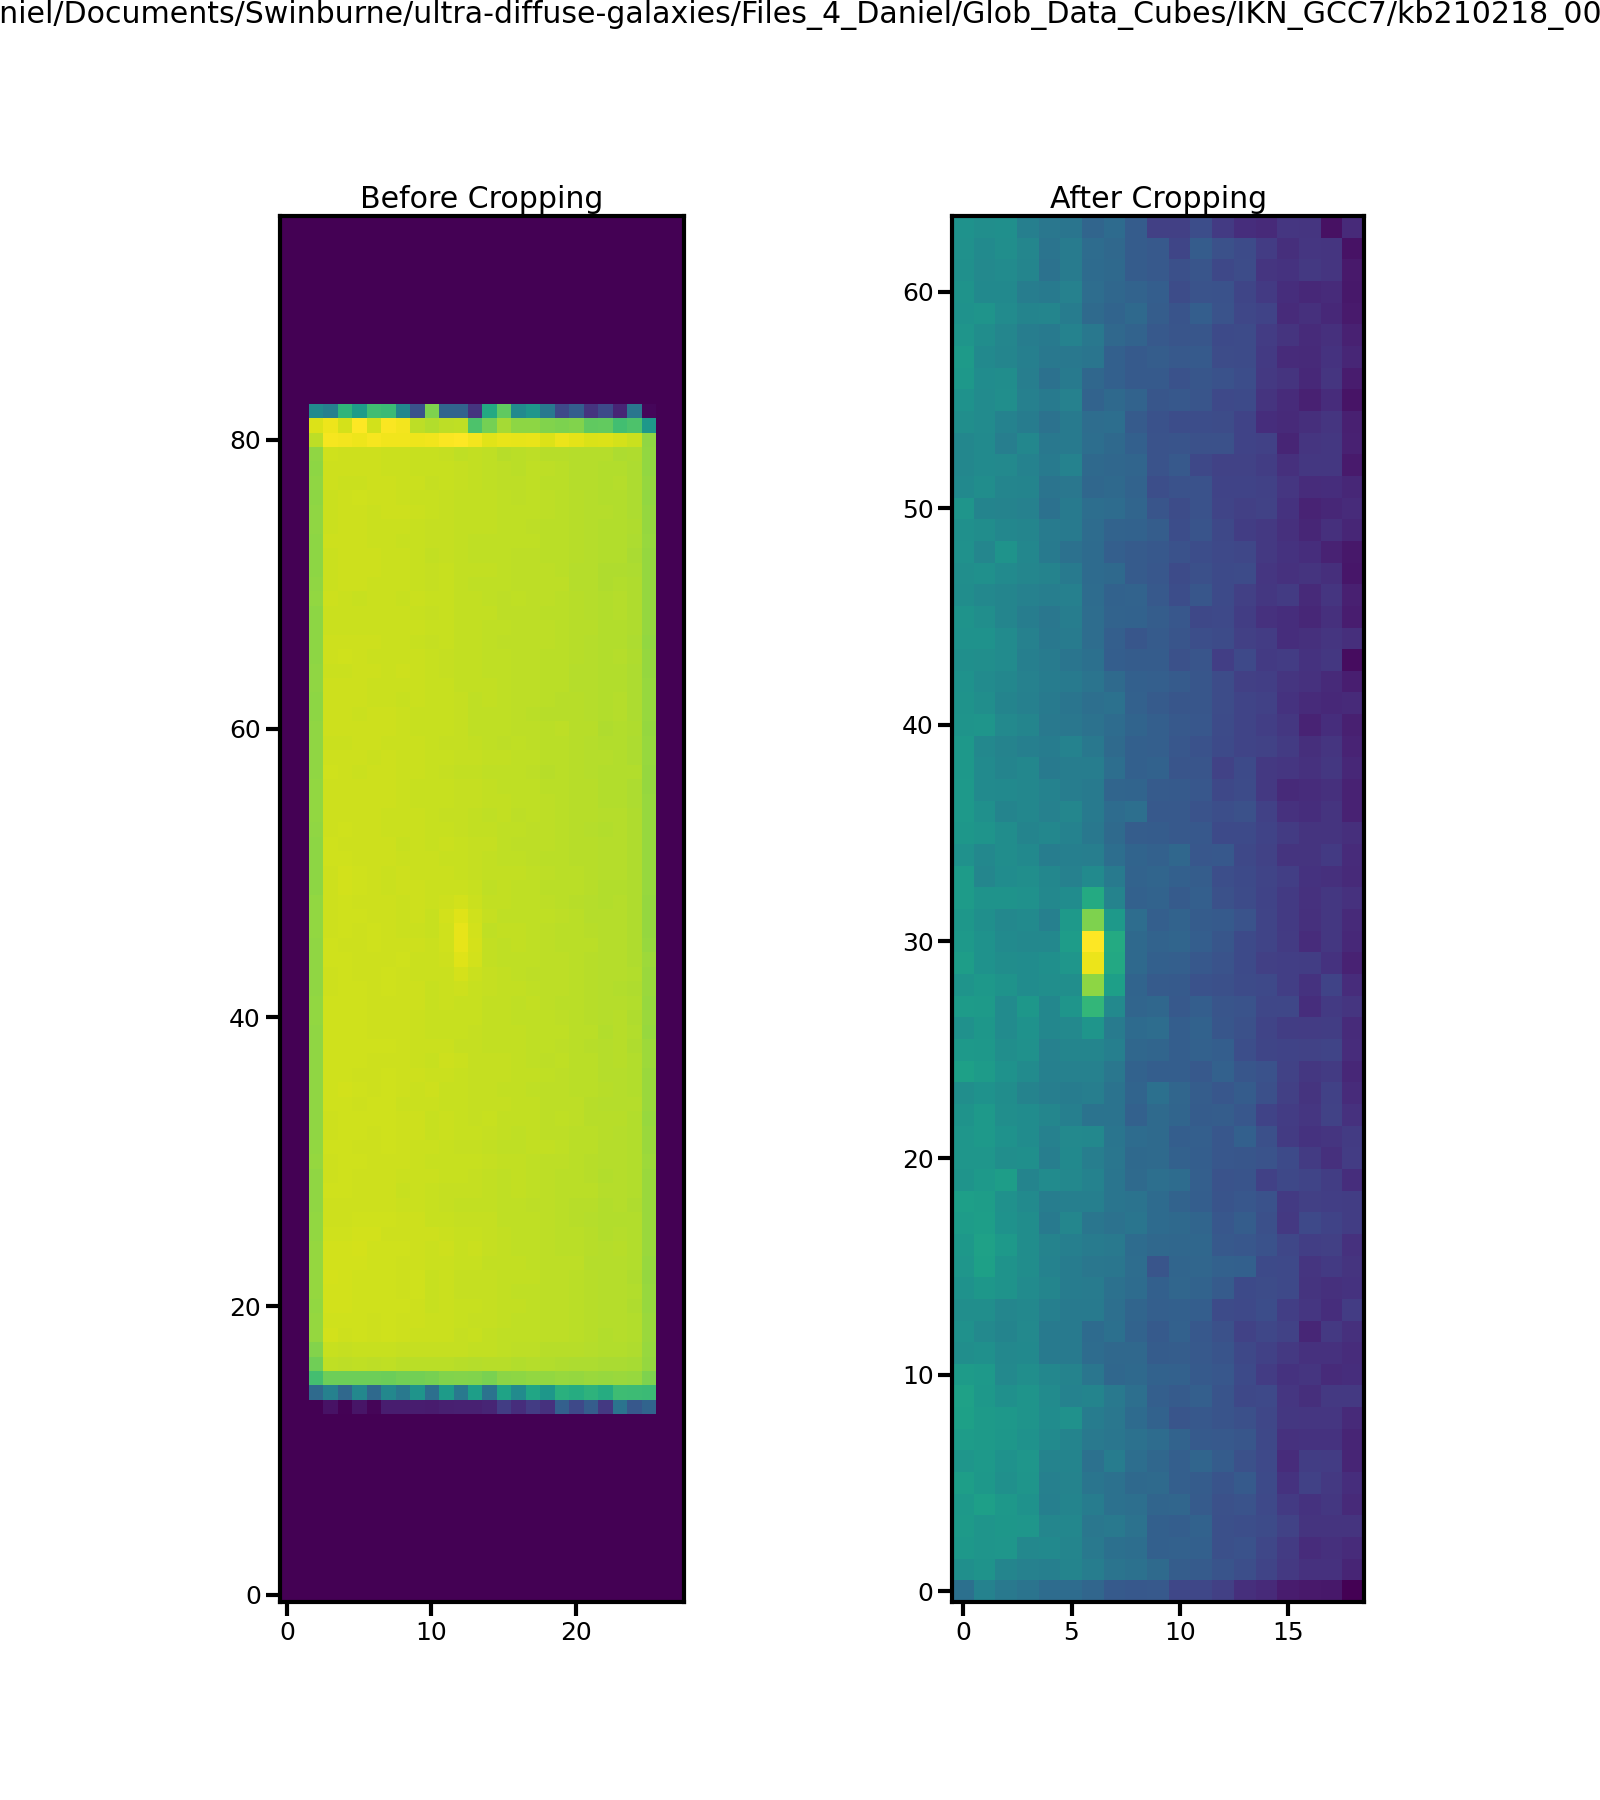

Files Written out


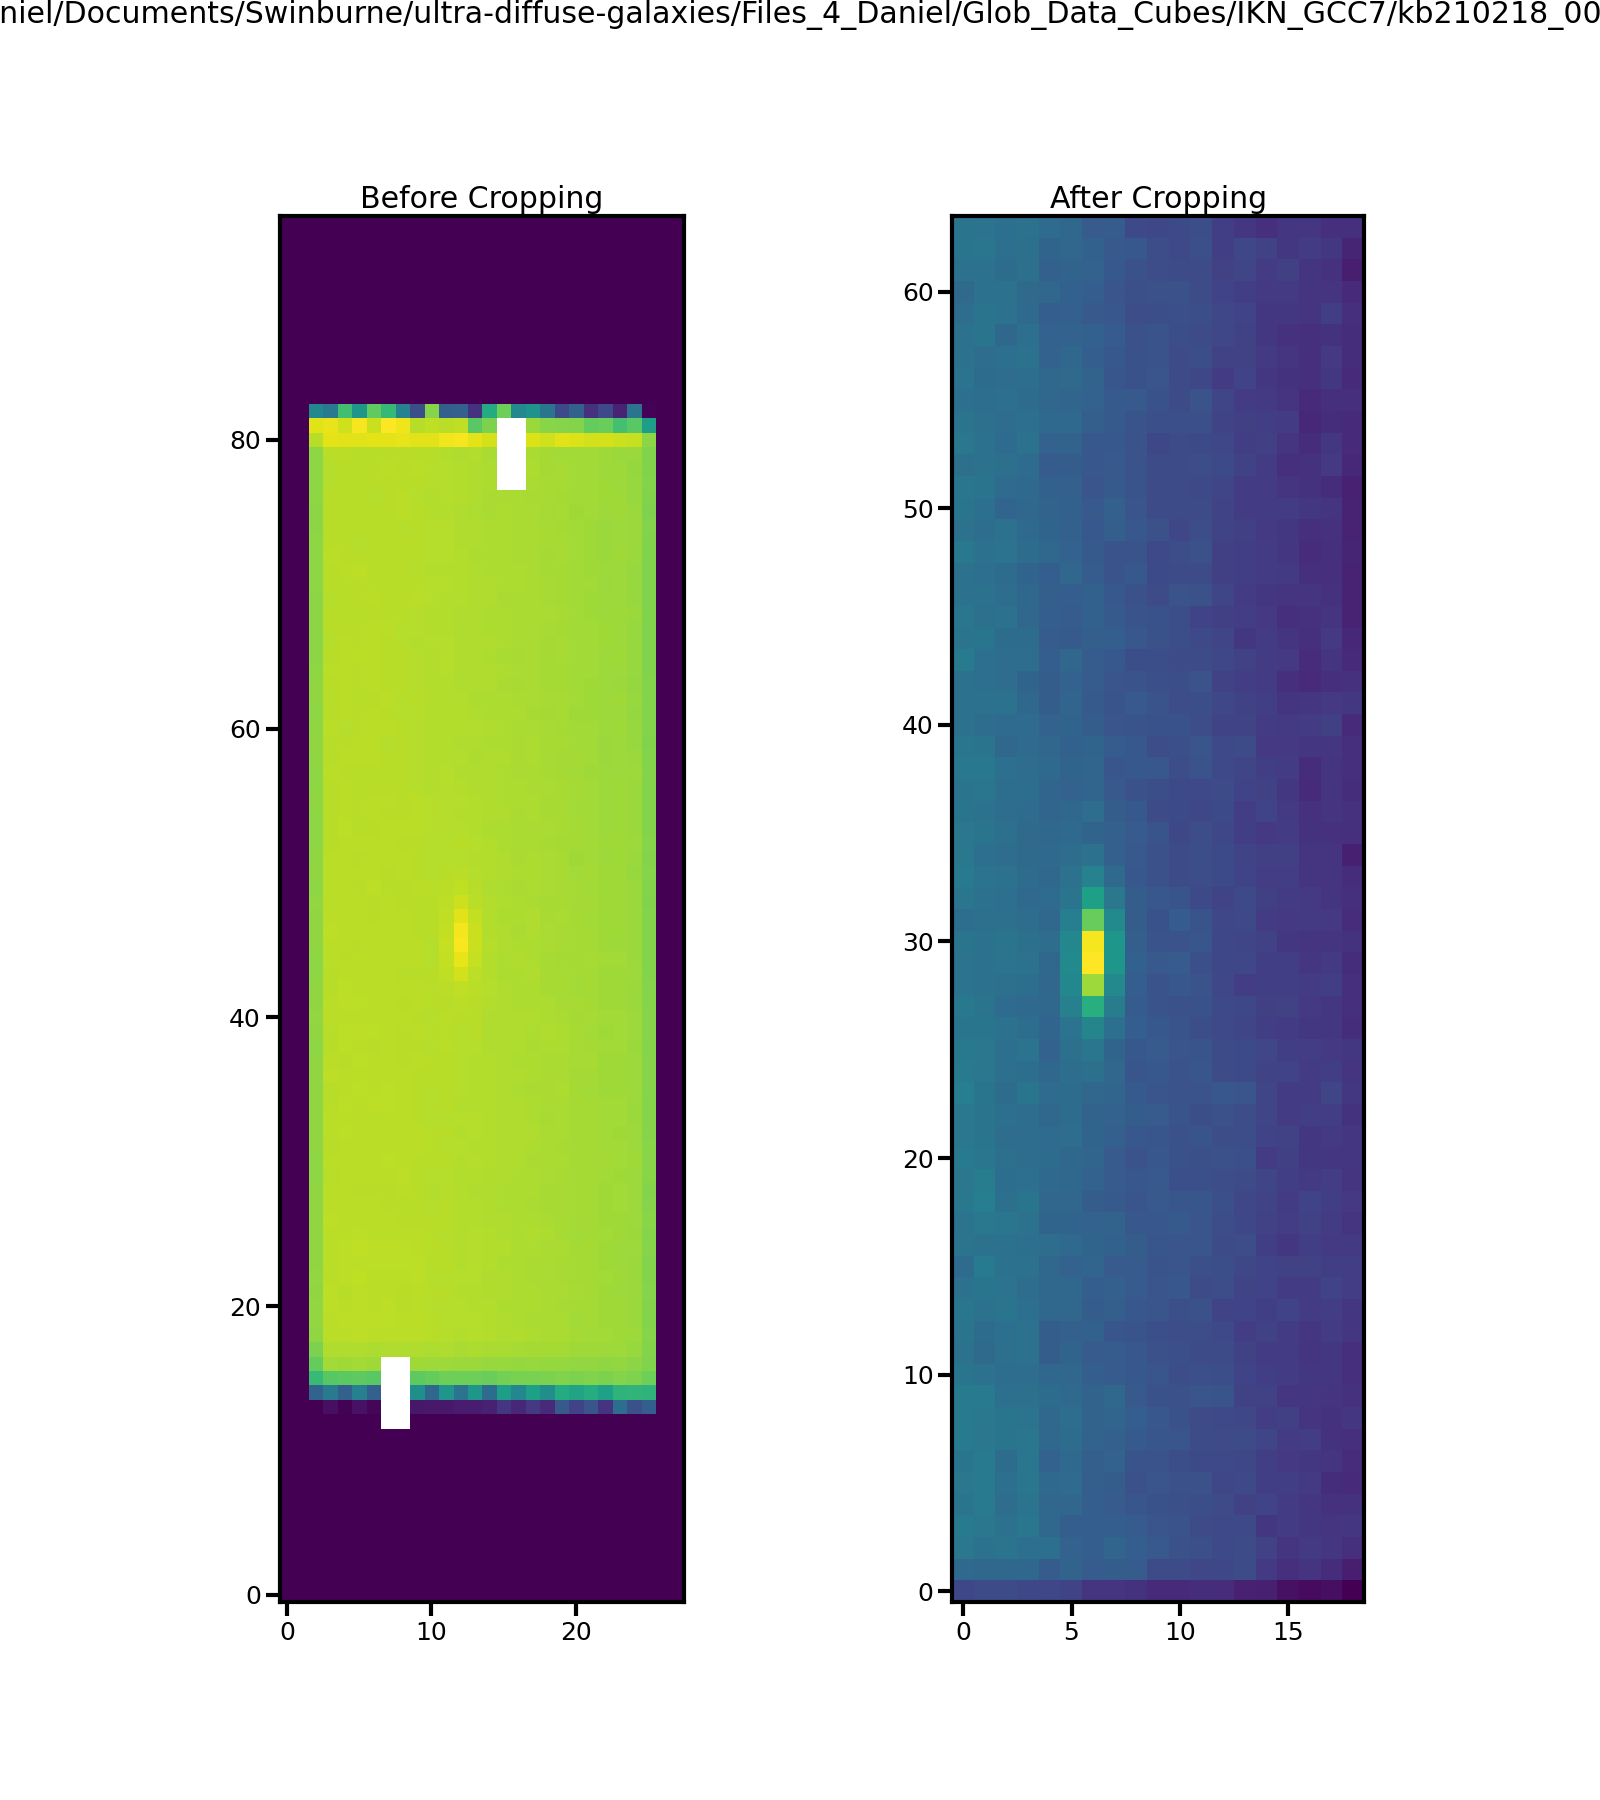

Files Written out


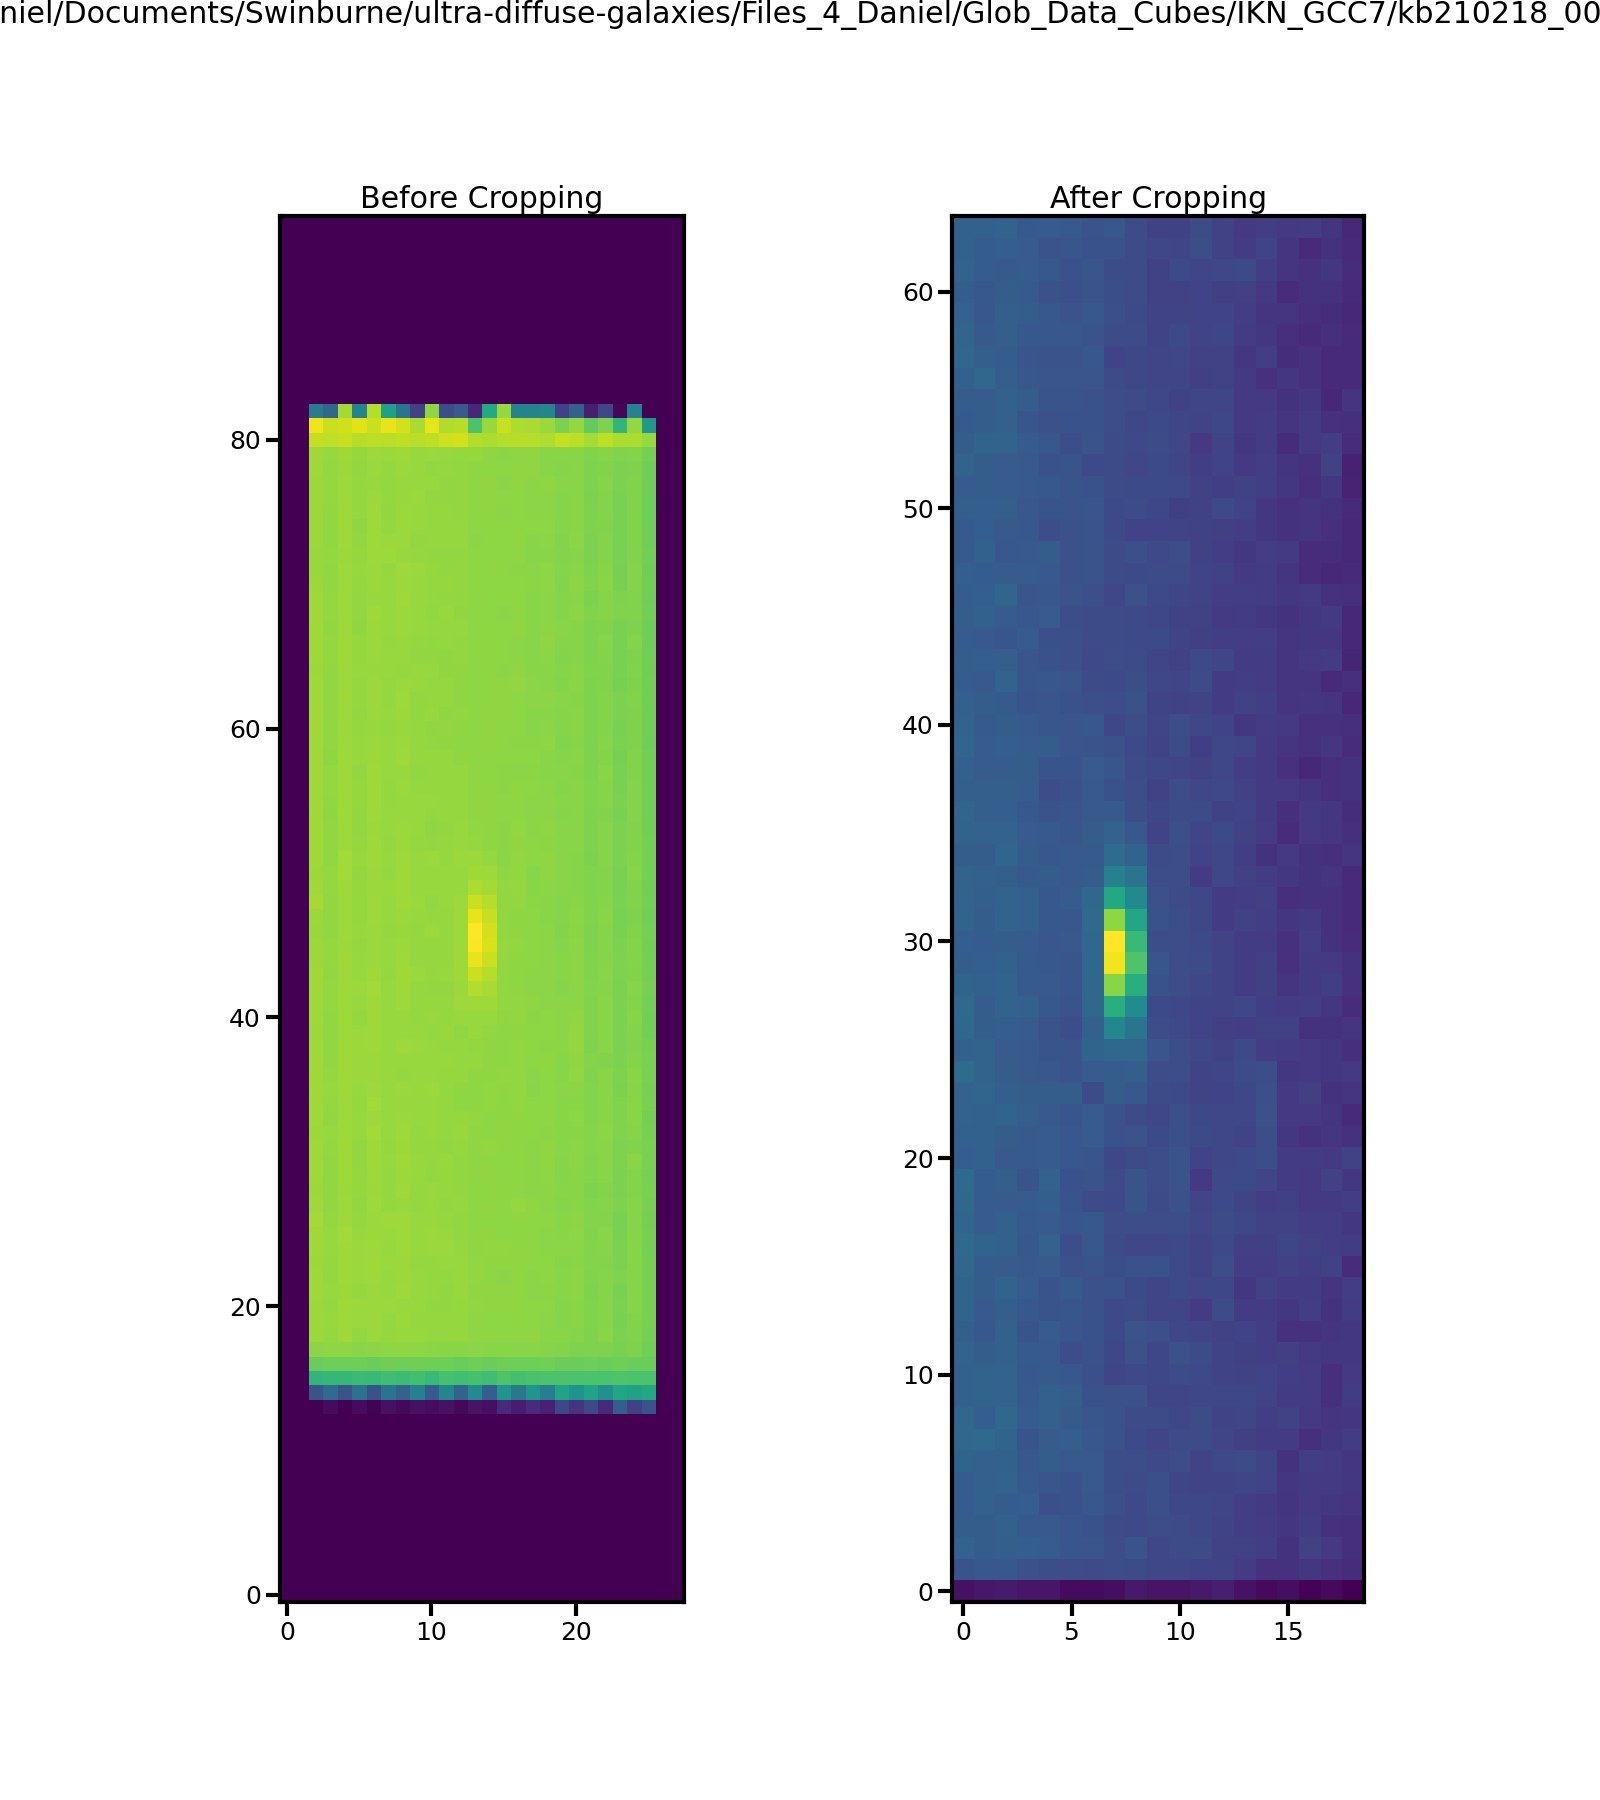

Files Written out


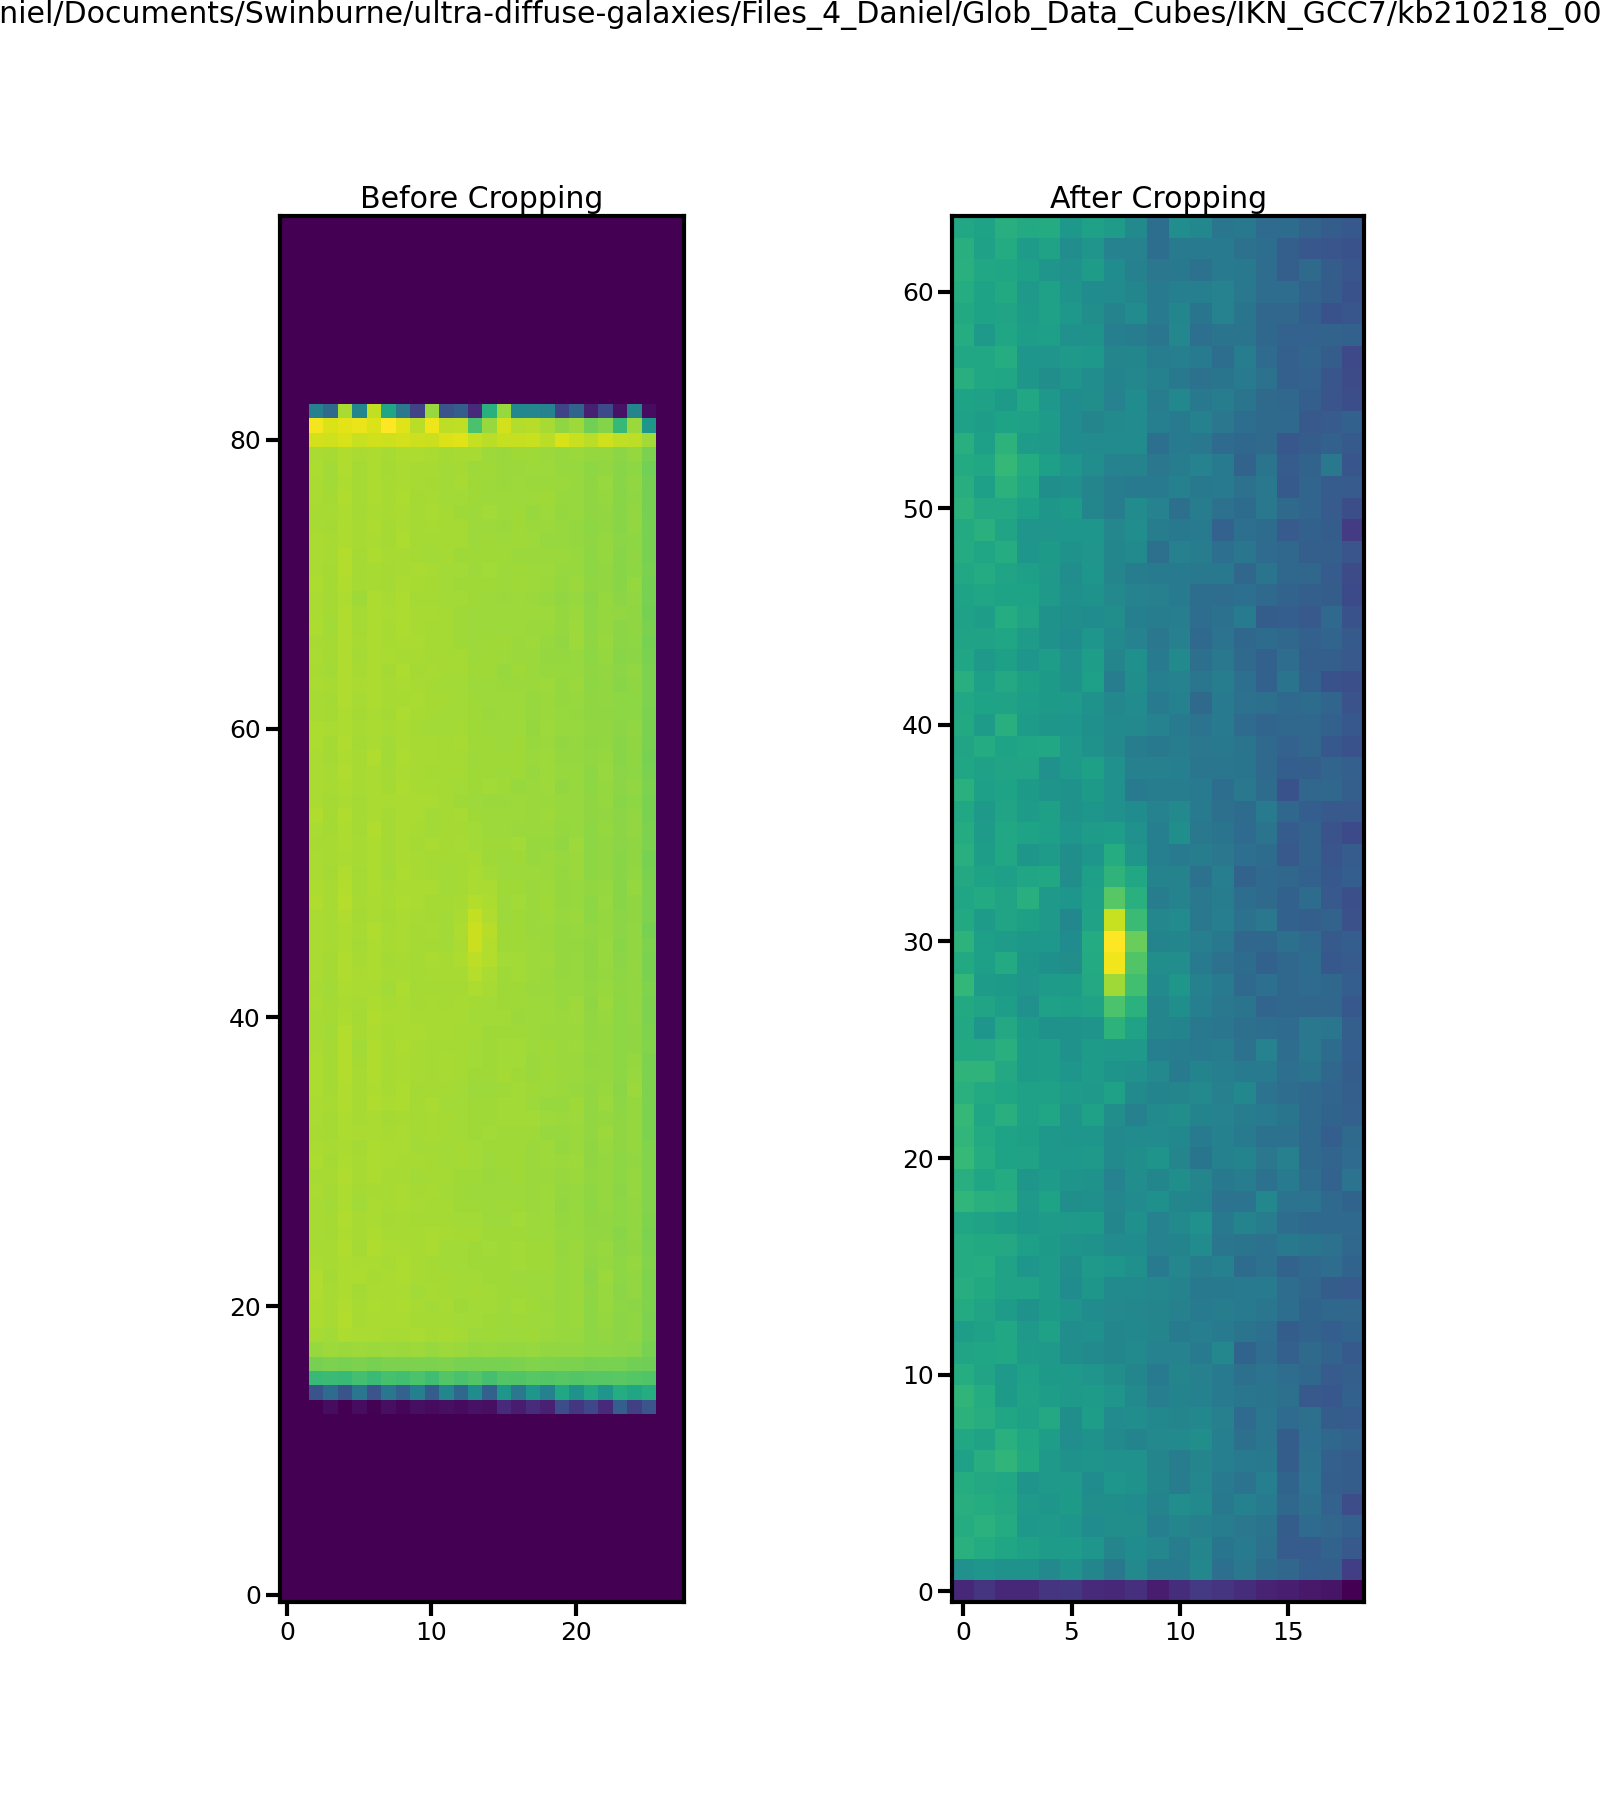

Files Written out
Code Competed Successfully in, 228.25 seconds


In [4]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/IKN_GCC7/' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 25
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 80

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [3]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'manual' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0,0,0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Correction Deltas: {np.diff(bary_corr)} km/s')
plt.close()

Barycentric correction: [0 0 0] km/s
Correction Deltas: [0 0] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/50.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/51.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/52.fits']
[3632. 3633. 3634. ... 5622. 5623. 5624.]


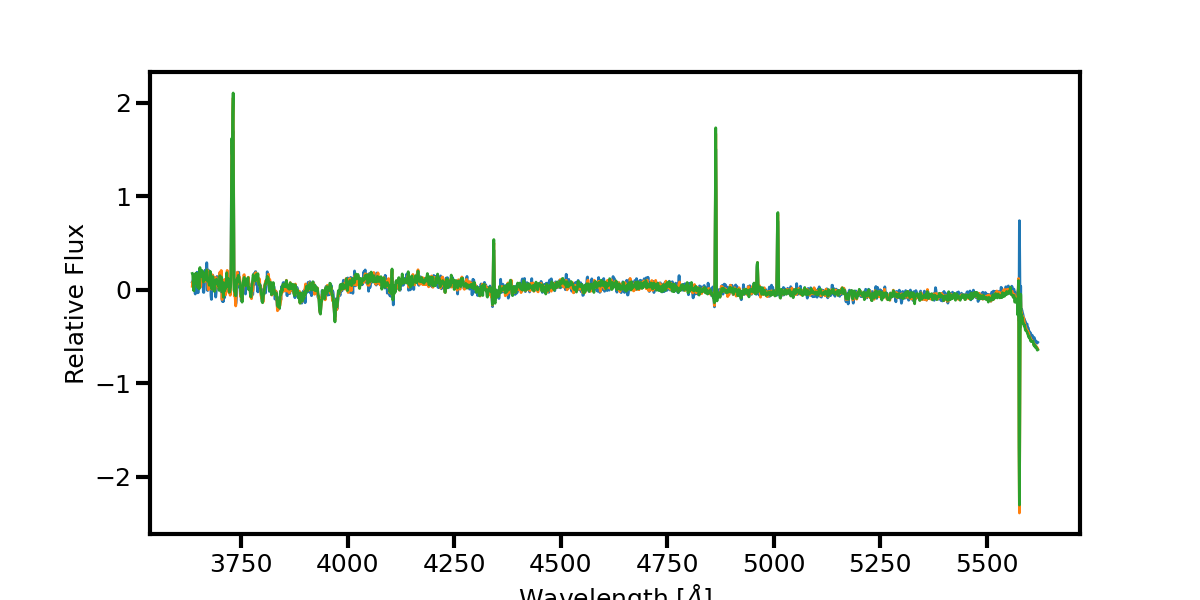

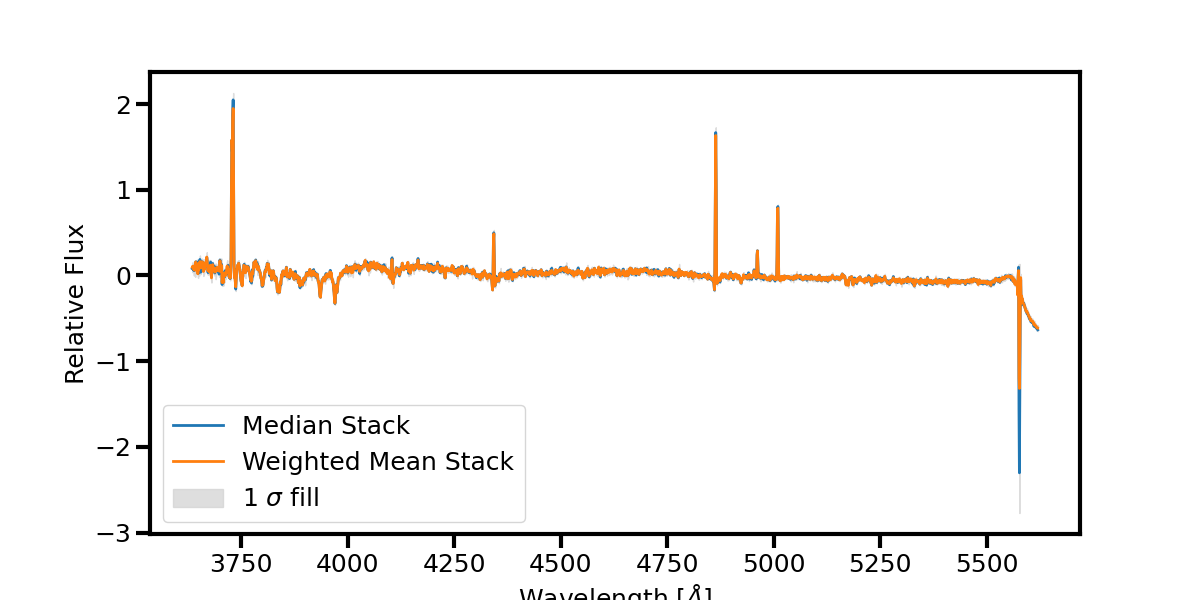

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/mean.fits' already exists.

In [6]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/' # path to directory containing spectra
s3_file_keyword = '[0-9]*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close()
spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack

### step 4.1: Check ppxf velocities of degrees

In [2]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs/obj1/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 5000 / 1800 # instrument resolution
# min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials
wavcut = 1800 # cut the spectra at this wavelength. -1 to not cut

# degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
# velocities = []
# for deg in tqdm(degrees):
#     vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
#     clear_output(wait=True)
#     velocities.append(vel)
# plt.close()

# plt.figure(figsize=(10, 5))
# plt.scatter(degrees, velocities)
# plt.xlabel("Polynomial Degree")
# plt.ylabel("Radial Velocity [km/s]")
# plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
# plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma
 comp.  0:       156        71
chi2/DOF: 45.09; DOF: 1792; degree = 6; mdegree = 6
method = capfit; Jac calls: 9; Func calls: 83; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/150
Formal errors:
     dV    dsigma   dh3      dh4
     4.5     8.6
Elapsed time in pPXF: 0.91 s
Best-fitting redshift z = 0.000521 +/- 0.000015
Signal-to-noise ratio per pixel: 28.77
0.779346602060552 0.027086001744468586


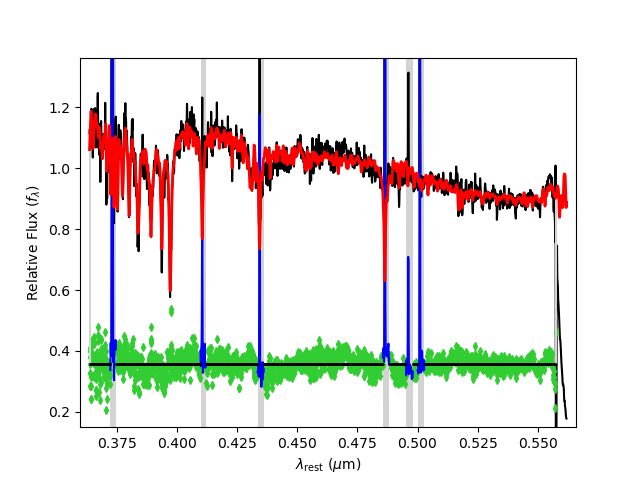

In [7]:
""" User inputs """
degree = 6 # degree of Legendre polynomial to use

plt.close()
ppxf_kinematics(ppxf_file, fwhm_gal, degree, wavcut)
plt.savefig(os.path.dirname(ppxf_file) + '/fit.png')